# Polynomial Collocation (Interpolation/Extrapolation) and Approximation

**Last Revised on Wednesday February 17.**

**References:**

- Section 3.1 *Data and Interpolating Functions* of [Sauer](../references.html#Sauer)
- Section 3.1 *Interpolation and the Lagrange Polynomial* of [Burden&Faires](../references.html#Burden-Faires)
- Section 4.1 of [Chenney&Kincaid](../references.html#Chenney-Kincaid)

## Introduction

Numerical methods for dealing with functions require describing them, at least approximately, using a finite list of numbers, and the most basic approach is to approximate by a polynomial.
(Other important choices are rational functions and "trigonometric polynomials": sums of multiples of sines and cosines.)
Such polynomials can then be used to aproximate derivatives and integrals.

The simplest idea for approximating $f(x)$ on domain $[a, b]$ is to start with a finite collection of **node** values $x_i \in [a, b]$, $0 \leq i \leq n$ and then seek a polynomial $p$ which **collocates** with $f$ at those values: $p(x_i) = f(x_i)$ for $0 \leq i \leq n$.
Actually, we can put the function aside for now, and simply seek a polynomial that passes through a list of points $(x_i, y_i)$; later we will achieve collocation with $f$ by choosing $y_i = f(x_i)$.

In fact there are infinitely many such polynomials: given one, add to it any polynomial with zeros at all of the $n+1$ notes.
So to make the problem well-posed, we seek the collocating polynomial of *lowest degree*.

**Theorem**
Given $n+1$ distinct values $x_i$, $0 \leq i \leq n$, and corresponding $y$-values $y_i$,
there is a unique polynomial $P$ of degree at most $n$ with $P(x_i) = y_i$ for $0 \leq i \leq n$.

(*Note:* although the degree is typically $n$, it can be less; as an extreme example, if all $y_i$ are equal to $c$, then $P(x)$ is that constant $c$.)

Historically there are several methods for finding $P_n$ and proving its uniqueness, in particular, the *divided difference* method introduced by Newton and the *Lagrange polynomial* method.
However for our purposes, and for most modern needs, a different method is easiest, and it also introduces a strategy that will be of repeated use later in this course: the **Method of Undertermined Coefficients** or **MUC**.

In general, this method starts by assuming that the function wanted is a sum of unknown multiples of a collection of known functions.
Here, $P(x) = c_n x^n + c_{n-1} x^{n-1} + \cdots+ c_1 x + c_0 = \sum_{j=0}^n c_j x^j$.
<br>
(*Note:* any of the $c_i$ could be zero, including $c_n$, in which case the degree is less than $n$.)
<br>
The unknown factors ($c_0 \cdots c_n$) are the *undetermined coefficients.*

Next one states the problem as a system of equations for these undetermined coefficients, and solves them.
<br>
Here, we have $n+1$ conditions to be met:

$$P(x_i) = \sum_{j=0}^n c_j x_i^j = y_i, \quad 0 \leq i \leq n$$

This is a system if $n+1$ simultaneous linear equations in $n+1$ iunknowns, so the question of existence and uniqueness is exactly the question of whether the corresponding matrix is singular,
and so is equivalent to the case of all $y_i = 0$ having *only* the solution with all
$c_i = 0$.

Back in terms of polynomials, this is the claim that the only polynomial of degree at most $n$ with zeros $x_0 \dots x_n$.
And this is true, because any non-trivial polynomial with those $n+1$ distinct roots is of degree at least $n+1$, so the only "degree n" polynomial fitting this data is $P(x) \equiv 0$.
The theorem is proven.

The proof of this theorem is completely constructive; it gives the only numerical method we need, and which is the one implemented in Numpy through the pair of functions `numpy.polyfit` and `numpy.polyval` that we will use in examples.
(Aside: here as in many places, Numpy mimics the names and functionality of corresponding Matlab tools.)

Briefly, the algorithm is this (indexing from 0 !)
- Create the $n+1 \times n+1$ matrix $V$ with elements

$$v_{i,j} = x_i^j,\; 0 \leq i \leq n, \, 0 \leq j \leq n$$

and the $n+1$-element column vector $y$ with elements $y_i$ as above.
- Solve $V c = y$ for the vector of coefficients $c_j$ as above.

I use the name $V$ because this is called the **Vandermonde Matrix.**

In [1]:
from numpy import array, linspace, polyfit, polyval, zeros_like, empty_like, exp
from  matplotlib.pyplot import figure, plot, title, grid, legend

## Python example with `polyfit` and `polyval`from Numpy

As usual, I concoct a first example with known correct answer, by using a polynomial as $f$.

In [2]:
def f(x):
    return 3*x**4 - 5*x**3 -2*x**2 + 7*x + 4

In [3]:
n = 4
x_nodes = array([1., 2., 7., 5., 4.])  # They do not need to be in order
print(f"The x nodes 'x_i' are {x_nodes}")
y_nodes = empty_like(x_nodes)
for i in range(len(x_nodes)):
    y_nodes[i] = f(x_nodes[i])
print(f"The y values at the nodes are {y_nodes}")
c = polyfit(x_nodes, y_nodes, n)  # Note: n must as be specified; we will see why soon
print(f"The coefficients of P are {c}")
P_values = polyval(c, x_nodes)
print(f"The values of P(x_i) are {P_values}")

The x nodes 'x_i' are [1. 2. 7. 5. 4.]
The y values at the nodes are [   7.   18. 5443. 1239.  448.]
The coefficients of P are [ 3. -5. -2.  7.  4.]
The values of P(x_i) are [   7.   18. 5443. 1239.  448.]


### Python presentation aside: pretty-print the result

In [4]:
print("P(x) = ", end="")
for j in range(n-1):  # count up to j=n-2 only, omitting the x and constant terms
    print(f"{c[j]:.4}x^{n-j} + ", end="")
print(f"{c[-2]:.4}x + {c[-1]:.4}")

P(x) = 3.0x^4 + -5.0x^3 + -2.0x^2 + 7.0x + 4.0


## Example 2: $f(x)$ not a polynomial of degree $\leq n$

In [5]:
# Reduce the degree of $P$ to at most 3:
n = 3
# Truncate the data to 4 values:
x_nodes = array([0., 2., 3., 4.])
y_nodes = empty_like(x_nodes)
for i in range(len(x_nodes)):
    y_nodes[i] = f(x_nodes[i])
print(f"n is now {n}, the nodes are now {x_nodes}, with f(x_i) values {y_nodes}")
c = polyfit(x_nodes, y_nodes, n)
print(f"The coefficients of P are now {c}")
print("P(x) = ", end="")
for j in range(n-1):  # count up to j=n-2 only, omitting the x and constant terms
    print(f"{c[j]:.4}x^{n-j} + ", end="")
print(f"{c[-2]:.4}x + {c[-1]:.4}")
P_values = polyval(c, x_nodes)
print(f"The values of P(x_i) are now {P_values}")

n is now 3, the nodes are now [0. 2. 3. 4.], with f(x_i) values [  4.  18. 115. 448.]
The coefficients of P are now [ 22. -80.  79.   4.]
P(x) = 22.0x^3 + -80.0x^2 + 79.0x + 4.0
The values of P(x_i) are now [  4.  18. 115. 448.]


There are several ways to assess the accuracy of this fit; we start graphically, and later consider the maximum and root-mean-square (RMS) errors.

In [6]:
x = linspace(0, 4)  # With a default 50 points, for graphing

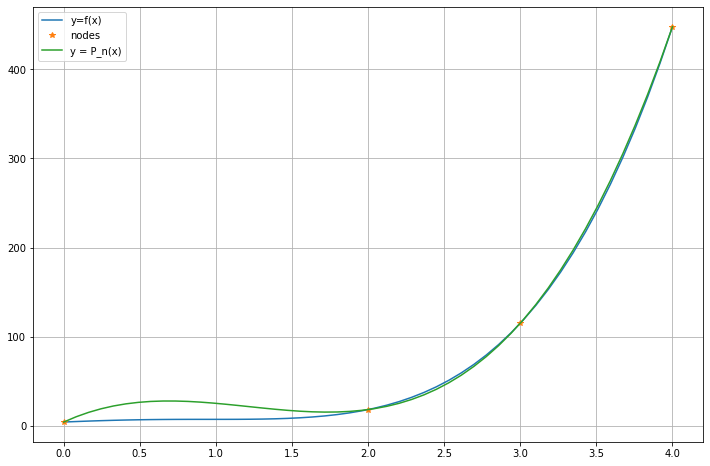

In [7]:
figure(figsize=[12,8])
plot(x, f(x), label="y=f(x)")
plot(x_nodes, y_nodes, "*", label="nodes")
P_n_x = polyval(c, x)
plot(x, P_n_x, label="y = P_n(x)")
legend()
grid(True)

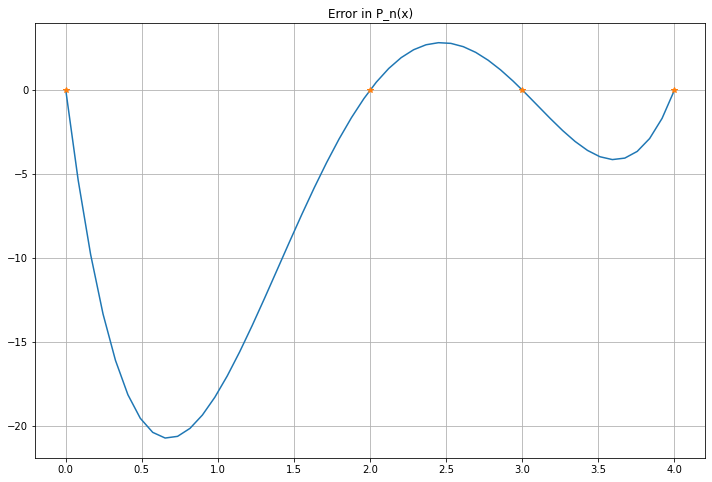

In [8]:
P_error = f(x) - P_n_x
figure(figsize=[12,8])
title("Error in P_n(x)")
plot(x, P_error, label="y=f(x)")
plot(x_nodes, zeros_like(x_nodes), "*")
grid(True)

## Example 3: $f(x)$ not a polynomial at all

In [9]:
def g(x): return exp(x)
a_g = -1
b_g = 1

In [10]:
n = 3
x_g_nodes = linspace(a_g, b_g, n+1)
y_g_nodes = empty_like(x_g_nodes)
for i in range(len(x_g_nodes)):
    y_g_nodes[i] = g(x_g_nodes[i])
print(f"{n=}")
print(f"node x values {x_g_nodes}")
print(f"node y values {y_g_nodes}")
c_g = polyfit(x_g_nodes, y_g_nodes, n)
print("P(x) = ", end="")

for j in range(n-1):  # count up to j=n-2 only, omitting the x and constant terms
    print(f"{c_g[j]:.4}x^{n-j} + ", end="")
print(f"{c_g[-2]:.4}x + {c_g[-1]:.4}")

P_values = polyval(c_g, x_g_nodes)
print(f"The values of P(x_i) are {P_values}")

n=3
node x values [-1.         -0.33333333  0.33333333  1.        ]
node y values [0.36787944 0.71653131 1.39561243 2.71828183]
P(x) = 0.1762x^3 + 0.5479x^2 + 0.999x + 0.9952
The values of P(x_i) are [0.36787944 0.71653131 1.39561243 2.71828183]


There are several ways to assess the accuracy of this fit.
We start graphically, and later consider the maximum and root-mean-square (RMS) errors.

In [11]:
x_g = linspace(a_g - 0.25, b_g + 0.25)  # Go a bit beyond the nodes in each direction

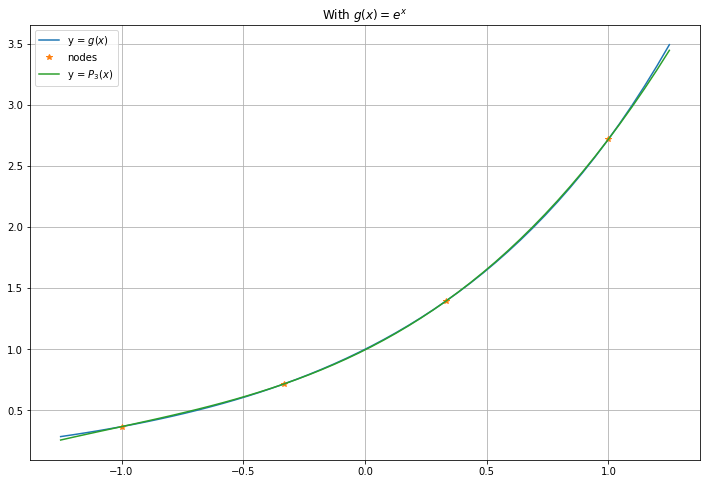

In [12]:
figure(figsize=[12,8])
title("With $g(x) = e^x$")
plot(x_g, g(x_g), label="y = $g(x)$")
plot(x_g_nodes, y_g_nodes, "*", label="nodes")
P_n_x = polyval(c_g, x_g)
plot(x_g, P_n_x, label=f"y = $P_{n}(x)$")
legend()
grid(True)

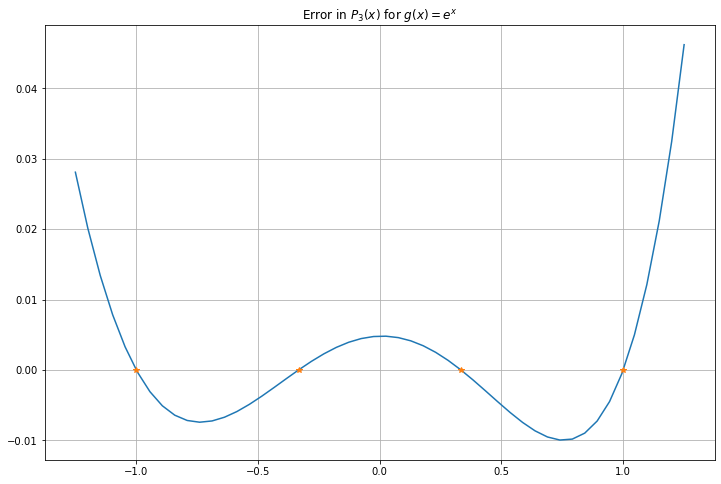

In [13]:
P_error = g(x_g) - P_n_x
figure(figsize=[12,8])
title(f"Error in $P_{n}(x)$ for $g(x) = e^x$")
plot(x_g, P_error)
plot(x_g_nodes, zeros_like(x_g_nodes), "*")
grid(True)

## Why the maximum degree $n$ must be specified in `polyval`

The function `numpy.polyval` can also give a polynomial of lower degree, in which case it is no longer an exact fit; we will consider this next;
returning to the first example of the quartic $y = f(x)$.

The coefficients of P are [ 97.91428571 -74.05714286]
P_1(x) = 97.91x + -74.06
The values of P(x_i) are [0.36787944 0.71653131 1.39561243 2.71828183]


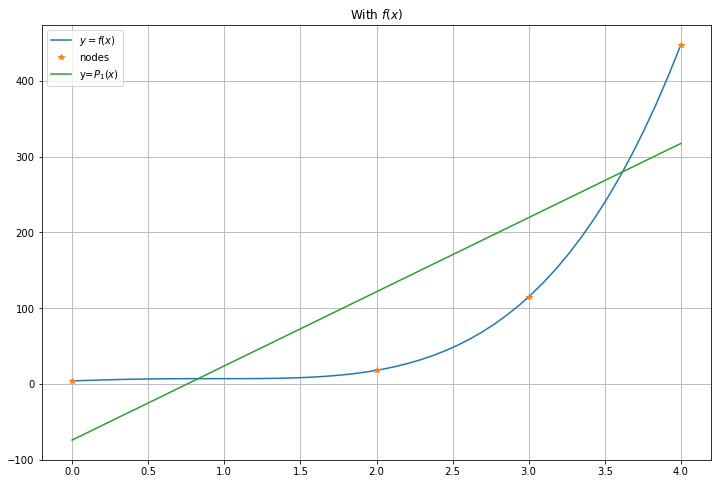

In [14]:
m = 1  # m is the maximum degree of the polynomial: m < n now
c_m = polyfit(x_nodes, y_nodes, m)
print(f"The coefficients of P are {c_m}")

P_m_x = polyval(c_m, x)

# Try to print P(x) again:
print(f"P_{m}(x) = ", end="")
for j in range(m-1):
    print(f"{c_m[j]:.4}x^{m-j} + ", end="")
print(f"{c_m[-2]:.4}x + {c_m[-1]:.4}")
print(f"The values of P(x_i) are {P_values}")

figure(figsize=[12,8])
title("With $f(x)$")
plot(x, f(x), label="$y=f(x)$")
plot(x_nodes, y_nodes, "*", label="nodes")
plot(x, P_m_x, label=f"y=$P_{m}(x)$")
legend()
grid(True)

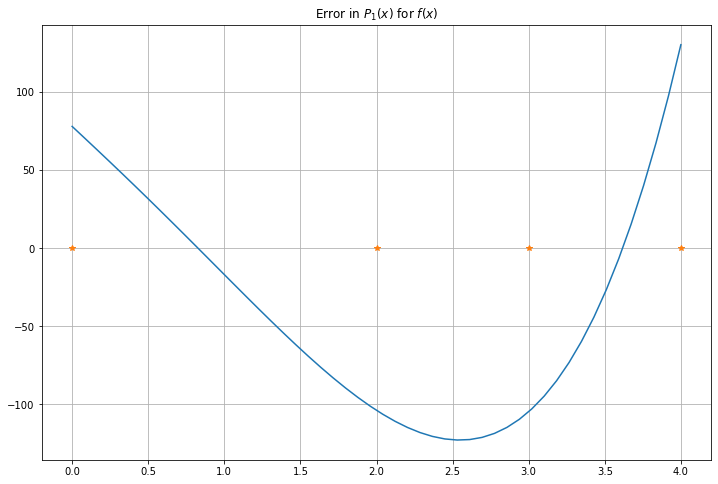

In [15]:
P_error = f(x) - P_m_x
figure(figsize=[12,8])
title("Error in $P_1(x)$ for $f(x)$")
plot(x, P_error, label="y=f(x)")
plot(x_nodes, zeros_like(x_nodes), "*")
grid(True)

## What is the degree $m$ polynomial given by `polyfit(x, y, m)`? Least squares fitting.

Another form of polynomial approximation is to find the polynomial of degree at most $m$ that gives the "best fit" to more data: $n > m$ points.
Then one cannot demand zero error at each point, and so instead aim to minimize some oveall measure of error.

Given a function $P(x)$ intended to approximately fit a set of data points $(x_i, y_i)$, the approximation errors are the values $E_i = y_i - P(x_i)$ at each node.
Considerening these as forming a vector $e$, two error minimization strategies are most often used:

1. Minimize the worst case error, by mimimizing the largest of the absolute errors $|E_i|$ — this is choosing $P$ to minimize $\| E \|_\infty$, often called Chebychev approximation.

2. Minimize the average error in the root-mean-square sense — this is minimizing the Euclidean norm $\| E \|_2$.

This time, the Euclidean norm or RMS error method is by far the easiest, giving a simple linear algebra solution.

For now, a quick sketch of the method; the justification will come soon.

If above we seek a polynomial of degree at most $m$ with $m \leq n$, we still get a system of equations $V c = y$, but now $V$ is $(n+1) \times (m+1)$, $c$ is $m+1$ and $y$ is $n+1$, so the system is *overdetermined*.

At this point the "+1" bits are annoying, so we will change notation and consider a more general setting:

Given a $n \times m$ matrix $A$, $n \geq m$, and an $n$-vector $b$, seek the $m$-vector $x$ that is the best approximate solution of $Ax = b$ in the sense that the residual $Ax - b$ is as small as possible.
It turns out that the solution comes from multiplying through by $A^T$, getting

$$(A^T A) x = A^T b$$

which is now an $m \times m$ system of equations with a unique solution — and it is the "right" one!

---
This work is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)